# Analyses de Machine Learning (Prédiction)

## Objectif

L’objectif de cette approche de Machine Learning est de prédire de manière anticipée le risque d’échec ou de décrochage académique des étudiants, avant que celui-ci ne se matérialise par une baisse effective des résultats ou un abandon.

## Installation et import de MLflow + les librairies nécessaires

In [ ]:
!pip -q install mlflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.5/780.5 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import mlflow
import mlflow.sklearn

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.metrics import make_scorer, fbeta_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


## Load du CSV

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving Student Insomnia and Educational Outcomes Dataset_version-2 (1).csv to Student Insomnia and Educational Outcomes Dataset_version-2 (1).csv


In [ ]:
df_students = pd.read_csv("Student Insomnia and Educational Outcomes Dataset_version-2 (1).csv")
print("Shape:", df_students.shape)
df_students.head()


Shape: (996, 16)


,Timestamp,1. What is your year of study?,2. What is your gender?,3. How often do you have difficulty falling asleep at night?,"4. On average, how many hours of sleep do you get on a typical day?",5. How often do you wake up during the night and have trouble falling back asleep?,6. How would you rate the overall quality of your sleep?,7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?,"8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?","9. How often do you miss or skip classes due to sleep-related issues (e.g., insomnia, feeling tired)?",10. How would you describe the impact of insufficient sleep on your ability to complete assignments and meet deadlines?,"11. How often do you use electronic devices (e.g., phone, computer) before going to sleep?","12. How often do you consume caffeine (coffee, energy drinks) to stay awake or alert?",13. How often do you engage in physical activity or exercise?,14. How would you describe your stress levels related to academic workload?,15. How would you rate your overall academic performance (GPA or grades) in the past semester?
0,10/24/2024 16:51:15,Graduate student,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Sometimes,Often,Often (3-4 times a week),Moderate impact,Often (5-6 times a week),Rarely (1-2 times a week),Sometimes (3-4 times a week),High stress,Average
1,10/24/2024 16:51:51,Third year,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Often,Sometimes,Sometimes (1-2 times a week),Major impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Sometimes (3-4 times a week),Low stress,Good
2,10/24/2024 16:52:21,First year,Female,Sometimes (3-4 times a week),7-8 hours,Sometimes (3-4 times a week),Good,Often,Often,Sometimes (1-2 times a week),Major impact,Often (5-6 times a week),Often (5-6 times a week),Often (5-6 times a week),High stress,Below Average
3,10/24/2024 16:53:00,Third year,Male,Often (5-6 times a week),More than 8 hours,Sometimes (3-4 times a week),Poor,Often,Often,Rarely (1-2 times a month),Minor impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Every day,Extremely high stress,Excellent
4,10/24/2024 16:53:25,Graduate student,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Very good,Always,Sometimes,Sometimes (1-2 times a week),Moderate impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Often (5-6 times a week),Low stress,Average


## Colonnes exactes + sélection des variables ML (X + Y)

In [ ]:
year_col = "1. What is your year of study?"
gender_col = "2. What is your gender?"

fall_asleep_col = "3. How often do you have difficulty falling asleep at night? "
sleep_hours_col = "4. On average, how many hours of sleep do you get on a typical day?"
wake_up_col = "5. How often do you wake up during the night and have trouble falling back asleep?"
sleep_quality_col = "6. How would you rate the overall quality of your sleep?"

concentration_col = "7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?"
fatigue_col = "8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?"

devices_col = "11. How often do you use electronic devices (e.g., phone, computer) before going to sleep?"
caffeine_col = "12. How often do you consume caffeine (coffee, energy drinks) to stay awake or alert?"
physical_activity_col = "13. How often do you engage in physical activity or exercise?"

stress_col = "14. How would you describe your stress levels related to academic workload?"
performance_col = "15. How would you rate your overall academic performance (GPA or grades) in the past semester?"
impact_assign_col = "10. How would you describe the impact of insufficient sleep on your ability to complete assignments and meet deadlines?"
miss_classes_col = "9. How often do you miss or skip classes due to sleep-related issues (e.g., insomnia, feeling tired)?"

X_raw_cols = [
    year_col, gender_col,
    sleep_hours_col, sleep_quality_col,
    fall_asleep_col, wake_up_col,
    stress_col, fatigue_col, concentration_col,
    caffeine_col, devices_col, physical_activity_col
]

df_ml = df_students[X_raw_cols + [performance_col]].copy()
df_ml.head()


,1. What is your year of study?,2. What is your gender?,"4. On average, how many hours of sleep do you get on a typical day?",6. How would you rate the overall quality of your sleep?,3. How often do you have difficulty falling asleep at night?,5. How often do you wake up during the night and have trouble falling back asleep?,14. How would you describe your stress levels related to academic workload?,"8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?",7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?,"12. How often do you consume caffeine (coffee, energy drinks) to stay awake or alert?","11. How often do you use electronic devices (e.g., phone, computer) before going to sleep?",13. How often do you engage in physical activity or exercise?,15. How would you rate your overall academic performance (GPA or grades) in the past semester?
0,Graduate student,Male,7-8 hours,Good,Often (5-6 times a week),Often (5-6 times a week),High stress,Often,Sometimes,Rarely (1-2 times a week),Often (5-6 times a week),Sometimes (3-4 times a week),Average
1,Third year,Male,7-8 hours,Good,Often (5-6 times a week),Often (5-6 times a week),Low stress,Sometimes,Often,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Sometimes (3-4 times a week),Good
2,First year,Female,7-8 hours,Good,Sometimes (3-4 times a week),Sometimes (3-4 times a week),High stress,Often,Often,Often (5-6 times a week),Often (5-6 times a week),Often (5-6 times a week),Below Average
3,Third year,Male,More than 8 hours,Poor,Often (5-6 times a week),Sometimes (3-4 times a week),Extremely high stress,Often,Often,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Every day,Excellent
4,Graduate student,Male,7-8 hours,Very good,Often (5-6 times a week),Often (5-6 times a week),Low stress,Sometimes,Always,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Often (5-6 times a week),Average


## Preprocess (mapping sommeil + nettoyage) + définition de Y

### Classification individuelle (supervisée)

In [ ]:
def norm(x):
    return np.nan if pd.isna(x) else str(x).strip().lower()

# Mapping sommeil catégories -> numérique
sleep_hours_mapping = {
    "Less than 5 hours": 4.0,
    "5-6 hours": 5.5,
    "7-8 hours": 7.5,
    "More than 8 hours": 8.5
}

df_ml["sleep_hours_cat"] = df_ml[sleep_hours_col].astype(str).str.strip()
df_ml["sleep_hours_num"] = df_ml["sleep_hours_cat"].map(sleep_hours_mapping)

# Cible binaire : à risque = performance faible (Poor OU Below Average)
df_ml["y_risk"] = df_ml[performance_col].map(norm).isin(["poor", "below average"]).astype(int)

# Dataset final pour ML
X_cols = [
    year_col, gender_col,
    "sleep_hours_num", sleep_quality_col,
    fall_asleep_col, wake_up_col,
    stress_col, fatigue_col, concentration_col,
    caffeine_col, devices_col, physical_activity_col
]

df_model = df_ml[X_cols + ["y_risk"]].copy()
df_model = df_model.dropna(subset=["sleep_hours_num", "y_risk"])  # retirer lignes non exploitables

print("Shape ML:", df_model.shape)
df_model["y_risk"].value_counts(normalize=True) * 100


Shape ML: (898, 13)


,proportion
y_risk,
1,91.091314
0,8.908686


y = 1 → étudiant à risque

y = 0 → étudiant non à risque

## Split train/test

In [ ]:
X = df_model[X_cols]
y = df_model["y_risk"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (673, 12) Test: (225, 12)


## Pipeline de preprocessing (OneHot + StandardScaler)

In [ ]:
numeric_features = ["sleep_hours_num"]
categorical_features = [c for c in X_cols if c not in numeric_features]

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ],
    remainder="drop"
)


## Sauvegarde du CSV après preprocess
fit sur train, puis transformons train/test.

In [ ]:
X_train_proc = preprocess.fit_transform(X_train)
X_test_proc = preprocess.transform(X_test)

# Noms des colonnes après OneHot
ohe = preprocess.named_transformers_["cat"]
cat_names = ohe.get_feature_names_out(categorical_features)
feature_names = np.concatenate([numeric_features, cat_names])

def to_dense(mat):
    return mat.toarray() if hasattr(mat, "toarray") else mat

X_train_proc_df = pd.DataFrame(to_dense(X_train_proc), columns=feature_names, index=X_train.index)
X_test_proc_df  = pd.DataFrame(to_dense(X_test_proc),  columns=feature_names, index=X_test.index)

train_preprocessed = X_train_proc_df.copy()
train_preprocessed["y_risk"] = y_train.values

test_preprocessed = X_test_proc_df.copy()
test_preprocessed["y_risk"] = y_test.values

train_path = "train_preprocessed.csv"
test_path  = "test_preprocessed.csv"
train_preprocessed.to_csv(train_path, index=False)
test_preprocessed.to_csv(test_path, index=False)

print("CSV sauvegardés:", train_path, "et", test_path)
train_preprocessed.head()


CSV sauvegardés: train_preprocessed.csv et test_preprocessed.csv


,sleep_hours_num,1. What is your year of study?_First year,1. What is your year of study?_Graduate student,1. What is your year of study?_Second year,1. What is your year of study?_Third year,2. What is your gender?_Female,2. What is your gender?_Male,6. How would you rate the overall quality of your sleep?_Average,6. How would you rate the overall quality of your sleep?_Good,6. How would you rate the overall quality of your sleep?_Poor,...,"11. How often do you use electronic devices (e.g., phone, computer) before going to sleep?_Never","11. How often do you use electronic devices (e.g., phone, computer) before going to sleep?_Often (5-6 times a week)","11. How often do you use electronic devices (e.g., phone, computer) before going to sleep?_Rarely (1-2 times a week)","11. How often do you use electronic devices (e.g., phone, computer) before going to sleep?_Sometimes (3-4 times a week)",13. How often do you engage in physical activity or exercise?_Every day,13. How often do you engage in physical activity or exercise?_Never,13. How often do you engage in physical activity or exercise?_Often (5-6 times a week),13. How often do you engage in physical activity or exercise?_Rarely (1-2 times a week),13. How often do you engage in physical activity or exercise?_Sometimes (3-4 times a week),y_risk
511,-0.886085,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
150,-0.886085,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
742,1.128560,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
123,-0.886085,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
660,-0.886085,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


## Custom score : F2 (favorise recall)

In [ ]:
# Score personnalisé : F2 (beta=2) => privilégie le rappel (détecter les étudiants à risque)
custom_f2 = make_scorer(fbeta_score, beta=2, average="binary")


## Setup MLflow

In [ ]:
mlflow.set_experiment("Student_Risk_Prediction_MLflow")


2026/01/18 17:53:39 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2026/01/18 17:53:39 INFO mlflow.store.db.utils: Updating database tables
2026/01/18 17:53:39 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/01/18 17:53:39 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2026/01/18 17:53:39 INFO alembic.runtime.migration: Running upgrade  -> 451aebb31d03, add metric step
2026/01/18 17:53:39 INFO alembic.runtime.migration: Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
2026/01/18 17:53:39 INFO alembic.runtime.migration: Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
2026/01/18 17:53:40 INFO alembic.runtime.migration: Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
2026/01/18 17:53:40 INFO alembic.runtime.migration: Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
2026/01/18 17:53:40 INFO alembic.runtime.migration: Running 

<Experiment: artifact_location='/content/mlruns/1', creation_time=1768758821640, experiment_id='1', last_update_time=1768758821640, lifecycle_stage='active', name='Student_Risk_Prediction_MLflow', tags={}>

## Baseline (first model)

### Baseline : Régression logistique + log MLflow

2026/01/18 17:59:25 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Baseline terminée


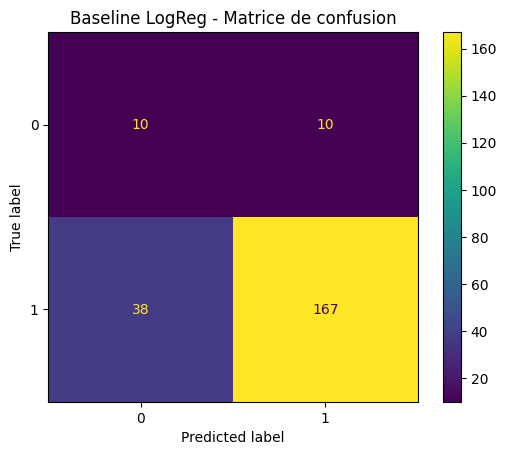

In [ ]:
baseline_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LogisticRegression(max_iter=3000, class_weight="balanced"))
])

with mlflow.start_run(run_name="Baseline_LogReg"):
    baseline_pipe.fit(X_train, y_train)
    y_pred = baseline_pipe.predict(X_test)

    metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred),
        "f2_custom": fbeta_score(y_test, y_pred, beta=2)
    }

    mlflow.log_param("model", "LogisticRegression")
    mlflow.log_param("class_weight", "balanced")
    for k, v in metrics.items():
        mlflow.log_metric(k, v)

    # artefacts
    report_txt = classification_report(y_test, y_pred)
    with open("baseline_report.txt", "w") as f:
        f.write(report_txt)
    mlflow.log_artifact("baseline_report.txt")

    cm = confusion_matrix(y_test, y_pred)
    pd.DataFrame(cm).to_csv("baseline_confusion_matrix.csv", index=False)
    mlflow.log_artifact("baseline_confusion_matrix.csv")

    # modèle
    mlflow.sklearn.log_model(baseline_pipe, artifact_path="model")

print("Baseline terminée")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Baseline LogReg - Matrice de confusion")
plt.show()


## GridSearch : on le fait sur 2 modèles utiles

### GridSearch : Arbre de décision (pédagogique) + MLflow

2026/01/18 18:02:40 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


GridSearch DecisionTree terminé
Best params: {'model__max_depth': 3, 'model__min_samples_leaf': 5, 'model__min_samples_split': 2}


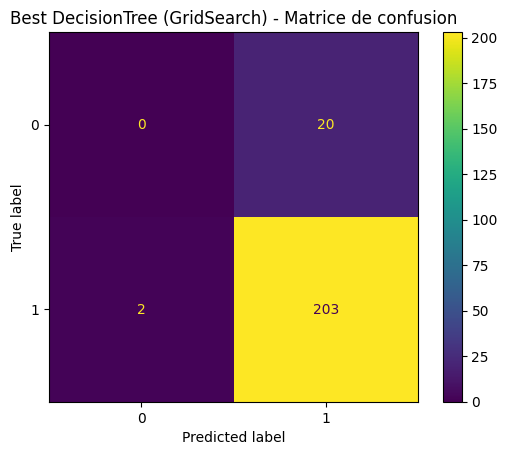

In [ ]:
tree_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", DecisionTreeClassifier(random_state=42))
])

tree_grid = {
    "model__max_depth": [3, 5, 7, 10, None],
    "model__min_samples_split": [2, 10, 30],
    "model__min_samples_leaf": [1, 5, 10]
}

grid_tree = GridSearchCV(
    tree_pipe,
    param_grid=tree_grid,
    scoring=custom_f2,
    cv=5,
    n_jobs=-1
)

with mlflow.start_run(run_name="GridSearch_DecisionTree_F2"):
    grid_tree.fit(X_train, y_train)

    best_tree = grid_tree.best_estimator_
    y_pred = best_tree.predict(X_test)

    metrics = {
        "best_cv_f2": grid_tree.best_score_,
        "test_accuracy": accuracy_score(y_test, y_pred),
        "test_precision": precision_score(y_test, y_pred),
        "test_recall": recall_score(y_test, y_pred),
        "test_f1": f1_score(y_test, y_pred),
        "test_f2_custom": fbeta_score(y_test, y_pred, beta=2)
    }

    mlflow.log_param("model", "DecisionTree")
    mlflow.log_params(grid_tree.best_params_)
    for k, v in metrics.items():
        mlflow.log_metric(k, v)

    # artefacts
    report_txt = classification_report(y_test, y_pred)
    with open("tree_grid_report.txt", "w") as f:
        f.write(report_txt)
    mlflow.log_artifact("tree_grid_report.txt")

    cm = confusion_matrix(y_test, y_pred)
    pd.DataFrame(cm).to_csv("tree_grid_confusion_matrix.csv", index=False)
    mlflow.log_artifact("tree_grid_confusion_matrix.csv")

    # log des CSV préprocessés
    mlflow.log_artifact(train_path)
    mlflow.log_artifact(test_path)

    mlflow.sklearn.log_model(best_tree, artifact_path="best_model")

print("GridSearch DecisionTree terminé")
print("Best params:", grid_tree.best_params_)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Best DecisionTree (GridSearch) - Matrice de confusion")
plt.show()


### GridSearch : Random Forest (robuste) + importance variables + MLflow

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
2026/01/18 18:06:27 WARNING mlflow.models.model: 

GridSearch RandomForest terminé
Best params: {'model__max_depth': None, 'model__min_samples_leaf': 5, 'model__min_samples_split': 2, 'model__n_estimators': 200}


,feature,importance
7,6. How would you rate the overall quality of y...,0.088847
39,"12. How often do you consume caffeine (coffee,...",0.080091
29,8. How often do you feel fatigued during the d...,0.044575
50,13. How often do you engage in physical activi...,0.036814
45,11. How often do you use electronic devices (e...,0.036090
22,14. How would you describe your stress levels ...,0.034875
44,11. How often do you use electronic devices (e...,0.034462
2,1. What is your year of study?_Graduate student,0.027800
24,14. How would you describe your stress levels ...,0.026702
30,8. How often do you feel fatigued during the d...,0.026614


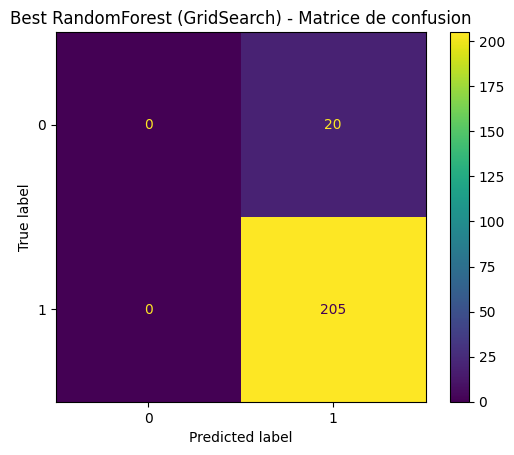

In [ ]:
rf_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestClassifier(random_state=42))
])

rf_grid = {
    "model__n_estimators": [200, 400],
    "model__max_depth": [None, 8, 12],
    "model__min_samples_split": [2, 10],
    "model__min_samples_leaf": [1, 5]
}

grid_rf = GridSearchCV(
    rf_pipe,
    param_grid=rf_grid,
    scoring=custom_f2,
    cv=5,
    n_jobs=-1
)

with mlflow.start_run(run_name="GridSearch_RandomForest_F2"):
    grid_rf.fit(X_train, y_train)

    best_rf = grid_rf.best_estimator_
    y_pred = best_rf.predict(X_test)

    metrics = {
        "best_cv_f2": grid_rf.best_score_,
        "test_accuracy": accuracy_score(y_test, y_pred),
        "test_precision": precision_score(y_test, y_pred),
        "test_recall": recall_score(y_test, y_pred),
        "test_f1": f1_score(y_test, y_pred),
        "test_f2_custom": fbeta_score(y_test, y_pred, beta=2)
    }

    mlflow.log_param("model", "RandomForest")
    mlflow.log_params(grid_rf.best_params_)
    for k, v in metrics.items():
        mlflow.log_metric(k, v)

    # Importance des variables
    # Récupérer les noms des features après OneHot (on refit preprocess dans best_rf)
    pre = best_rf.named_steps["preprocess"]
    ohe = pre.named_transformers_["cat"]
    cat_names = ohe.get_feature_names_out(categorical_features)
    feat_names = np.concatenate([numeric_features, cat_names])

    importances = best_rf.named_steps["model"].feature_importances_
    imp_df = pd.DataFrame({"feature": feat_names, "importance": importances}).sort_values("importance", ascending=False)
    imp_path = "rf_feature_importance.csv"
    imp_df.to_csv(imp_path, index=False)
    mlflow.log_artifact(imp_path)

    # artefacts
    report_txt = classification_report(y_test, y_pred)
    with open("rf_grid_report.txt", "w") as f:
        f.write(report_txt)
    mlflow.log_artifact("rf_grid_report.txt")

    cm = confusion_matrix(y_test, y_pred)
    pd.DataFrame(cm).to_csv("rf_grid_confusion_matrix.csv", index=False)
    mlflow.log_artifact("rf_grid_confusion_matrix.csv")

    mlflow.sklearn.log_model(best_rf, artifact_path="best_model")

print("GridSearch RandomForest terminé")
print("Best params:", grid_rf.best_params_)
display(imp_df.head(15))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Best RandomForest (GridSearch) - Matrice de confusion")
plt.show()


### visualisation de l’arbre décision(et le logger dans MLflow)

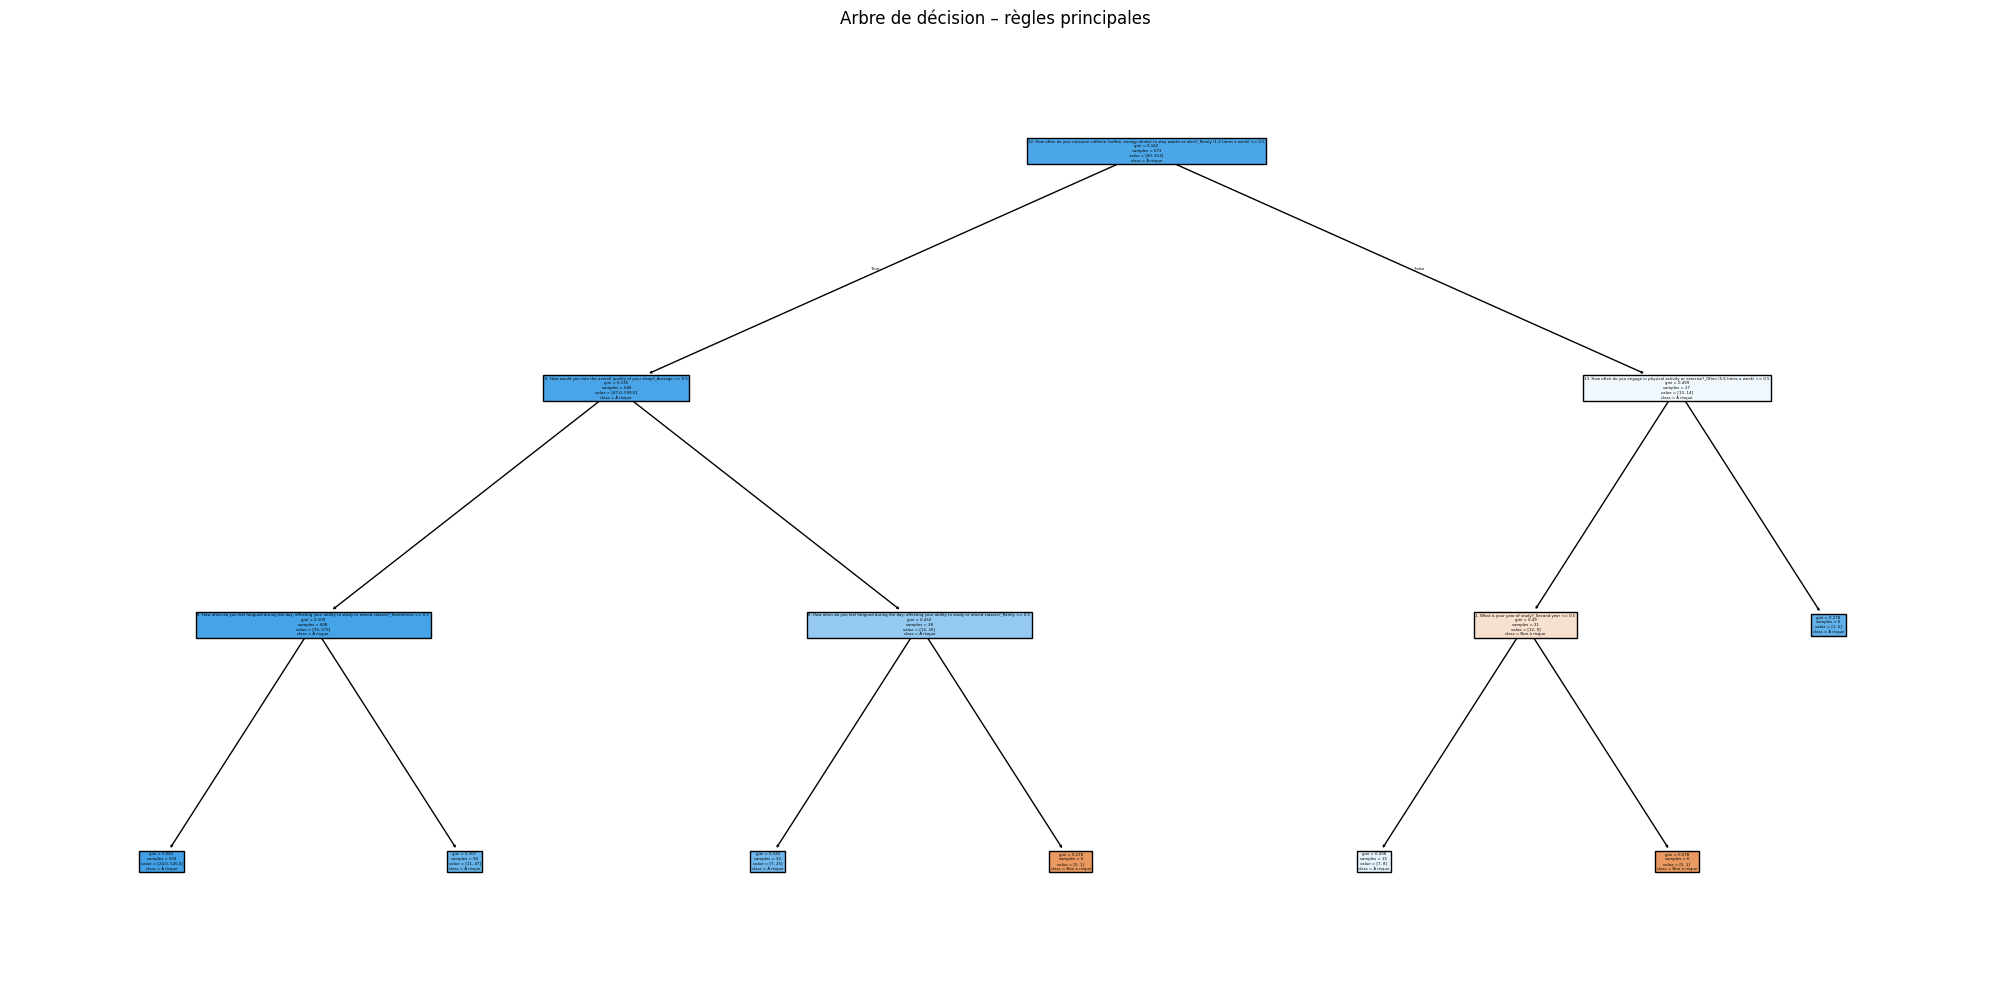

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree_model = best_tree.named_steps["model"]

plt.figure(figsize=(20,10))
plot_tree(
    tree_model,
    feature_names=feature_names,
    class_names=["Non à risque", "À risque"],
    filled=True,
    max_depth=3
)
plt.title("Arbre de décision – règles principales")
plt.tight_layout()
plt.savefig("decision_tree.png")
plt.show()

mlflow.log_artifact("decision_tree.png")


### le clustering (KMeans + PCA) et le logger dans MLflow

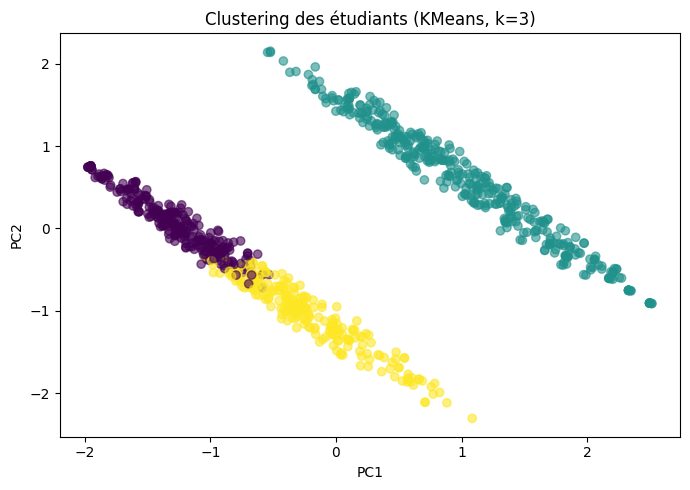

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Utilisons les données préprocessées
X_all_proc = preprocess.fit_transform(X)

# PCA 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_all_proc)

# Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_all_proc)

# Plot
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap="viridis", alpha=0.6)
plt.title("Clustering des étudiants (KMeans, k=3)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.savefig("clustering_pca.png")
plt.show()

mlflow.log_artifact("clustering_pca.png")


### KNN comme modèle “profils similaires”

In [ ]:
knn_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", KNeighborsClassifier())
])

knn_grid = {
    "model__n_neighbors": [5, 11, 21],
    "model__weights": ["uniform", "distance"]
}

grid_knn = GridSearchCV(knn_pipe, knn_grid, scoring=custom_f2, cv=5, n_jobs=-1)
grid_knn.fit(X_train, y_train)

print("Best KNN params:", grid_knn.best_params_)
print("Best CV F2:", grid_knn.best_score_)

best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)
print("Test F2:", fbeta_score(y_test, y_pred_knn, beta=2))


Best KNN params: {'model__n_neighbors': 21, 'model__weights': 'uniform'}
Best CV F2: 0.9811130788102073
Test F2: 0.9770114942528736


### Entraîner le modèle (RandomForest)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

model = RandomForestClassifier(n_estimators=400, random_state=42)

clf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", model)
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.10      0.18        20
           1       0.92      1.00      0.96       205

    accuracy                           0.92       225
   macro avg       0.96      0.55      0.57       225
weighted avg       0.93      0.92      0.89       225



### Prédire “tel étudiant”

In [ ]:
def predict_student(student_answers: dict, threshold=0.50):
    """
    student_answers: dict avec les mêmes clés que X_cols (sauf sleep_hours_num calculé depuis sleep_hours_col)
    threshold: seuil de décision pour classer "à risque"
    """

    # Copier et calculer sleep_hours_num si on te donne sleep_hours_col (texte)
    s = dict(student_answers)

    # Si l’utilisateur a fourni la catégorie d'heures, on convertit
    if sleep_hours_col in s and "sleep_hours_num" not in s:
        cat = str(s[sleep_hours_col]).strip()
        s["sleep_hours_num"] = sleep_hours_mapping.get(cat, np.nan)

    # Construire une ligne DataFrame avec exactement les colonnes X_cols
    row = pd.DataFrame([{col: s.get(col, np.nan) for col in X_cols}])

    # Probabilité d'être à risque
    proba = float(clf.predict_proba(row)[0, 1])
    pred = int(proba >= threshold)

    # Groupes métier
    if proba < 0.30:
        group = "Faible risque"
    elif proba < 0.60:
        group = "Risque modéré"
    else:
        group = "Risque élevé"

    return {"prediction_risque": pred, "proba_risque": proba, "groupe_risque": group}

# Exemple d'étudiant
student_example = {
    year_col: "First year",
    gender_col: "Female",
    fall_asleep_col: "Sometimes (3-4 times a week)",
    sleep_hours_col: "7-8 hours",
    wake_up_col: "Often (5-6 times a week)",
    sleep_quality_col: "Poor",
    concentration_col: "Often",
    fatigue_col: "Always",
    miss_classes_col: "Sometimes (1-2 times a week)",
    impact_assign_col: "Major impact",
    devices_col: "Every night",
    caffeine_col: "Often (5-6 times a week)",
    physical_activity_col: "Rarely (1-2 times a week)",
    stress_col: "Extremely high stress"
}

predict_student(student_example, threshold=0.50)


{'prediction_risque': 1,
 'proba_risque': 0.9358333333333334,
 'groupe_risque': 'Risque élevé'}

### Lancer l’UI MLflow

In [ ]:
!mlflow ui --port 5000 --host 0.0.0.0


Backend store URI not provided. Using sqlite:///mlflow.db
Registry store URI not provided. Using backend store URI.
2026/01/18 18:23:04 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2026/01/18 18:23:04 INFO mlflow.store.db.utils: Updating database tables
2026/01/18 18:23:04 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/01/18 18:23:04 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2026/01/18 18:23:04 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/01/18 18:23:04 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2026/01/18 18:23:04 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2026/01/18 18:23:04 INFO mlflow.store.db.utils: Updating database tables
2026/01/18 18:23:04 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/01/18 18:23:04 INFO alembic.runtime.migration: Will assume non-transactional DDL.
[MLflow] Security middleware enabled with default settings (loca

## Conclusion
Nous avons formulé un problème de classification binaire afin d’anticiper le risque académique avant l’échec (cible : performance faible = *Poor* ou *Below Average*).
Le pipeline inclut un preprocessing complet (mapping des heures de sommeil, encodage OneHot des variables catégorielles, standardisation), ainsi qu’un export des jeux préprocessés au format CSV.

Une baseline (Régression Logistique) a servi de référence interprétable.
Ensuite, une optimisation par GridSearchCV a été conduite en utilisant un score personnalisé **F2** (priorité au rappel) afin de maximiser la détection des étudiants à risque.
Les expériences (baseline + GridSearch) ont été tracées dans **MLflow** : paramètres, métriques, rapports de classification, matrices de confusion, artefacts (CSV préprocessés, importance des variables) et modèles.

Le modèle optimisé met en évidence l’importance de facteurs tels que le stress académique, la fatigue, les difficultés de concentration, et la qualité du sommeil. Ces résultats fournissent une base solide pour un système d’alerte précoce et une allocation ciblée des ressources d’accompagnement.